In [1]:
# Emission of Carbon Dioxide from countries all around the world recorded over 25+ years from 1990 to 2018
# This analysis would be a simple estimation of which countries have the highest amount of Co2 emmissions in 2018 and which 
# countries has highest increase in Co2 emissions.

# There was 1 null value, after removing the same, the analysis is continued with graphs and for top 10 countries on the basis
# of their emissions in 2018.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Diksha\OneDrive\Desktop\historical_emissions.csv")#for loading data
df.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


In [3]:
df.info

<bound method DataFrame.info of                  Country Data source                Sector  Gas    Unit  \
0                  World        CAIT  Total including LUCF  CO2  MtCO₂e   
1                  China        CAIT  Total including LUCF  CO2  MtCO₂e   
2          United States        CAIT  Total including LUCF  CO2  MtCO₂e   
3    European Union (27)        CAIT  Total including LUCF  CO2  MtCO₂e   
4                  India        CAIT  Total including LUCF  CO2  MtCO₂e   
..                   ...         ...                   ...  ...     ...   
190                Nauru        CAIT  Total including LUCF  CO2  MtCO₂e   
191               Tuvalu        CAIT  Total including LUCF  CO2  MtCO₂e   
192                 Niue        CAIT  Total including LUCF  CO2  MtCO₂e   
193                 Fiji        CAIT  Total including LUCF  CO2  MtCO₂e   
194                Ghana        CAIT  Total including LUCF  CO2  MtCO₂e   

         2018      2017      2016      2015      2014  ...      199

In [4]:
#There are 195 rows and 34 columns, and 29 columns are numerical

df.columns

Index(['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990'],
      dtype='object')

In [5]:
df.shape

(195, 34)

In [6]:
df=df.dropna()
df.isnull().sum()

Country        0
Data source    0
Sector         0
Gas            0
Unit           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
2000           0
1999           0
1998           0
1997           0
1996           0
1995           0
1994           0
1993           0
1992           0
1991           0
1990           0
dtype: int64

In [7]:
df.shape

(194, 34)

In [8]:
print(df.Sector.unique())
print(df.Gas.unique())
print(df.Unit.unique())
print(df['Data source'].unique())

['Total including LUCF']
['CO2']
['MtCO₂e']
['CAIT']


In [9]:
#As these columns have only 1 unique value in all the rows, they are not relevant for the analysis, so removed them.


df=df.drop(["Sector","Gas","Unit","Data source"], axis=1)
df1=df.iloc[1:,:] #Removing the first row as it has the sum of all rows under "World"

df1.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,China,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,4749.57,4581.90,4656.84,4563.52,4683.35,4670.34,4531.16,4753.12,4990.96,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),2636.99,2692.12,2669.54,2321.61,2263.78,2408.39,2482.45,2541.91,2900.69,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,2400.25,2267.16,2149.01,2085.38,2072.03,1901.98,1843.74,1695.97,1670.29,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32
5,Indonesia,1269.55,1081.11,1068.10,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,849.42,907.96,1484.56,772.38,909.21,881.31,869.88,855.30,846.23,832.39


In [10]:
df.sort_values(ascending=False,by='2018',inplace=True)
#Here we sorted the data by the countries with highest emissions in 2018 in the entire dataset.
df=df.iloc[:10:]#And selected the top 10 countries for analysis
df

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,36441.55,35588.70,35160.60,34521.91,34558.59,34217.18,33620.34,33226.01,33328.38,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,4749.57,4581.90,4656.84,4563.52,4683.35,4670.34,4531.16,4753.12,4990.96,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),2636.99,2692.12,2669.54,2321.61,2263.78,2408.39,2482.45,2541.91,2900.69,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,2400.25,2267.16,2149.01,2085.38,2072.03,1901.98,1843.74,1695.97,1670.29,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32
5,Indonesia,1269.55,1081.11,1068.10,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,849.42,907.96,1484.56,772.38,909.21,881.31,869.88,855.30,846.23,832.39
6,Japan,1074.08,1119.86,1139.33,1131.74,1170.11,1211.27,1202.66,1162.67,1057.96,...,1090.14,1055.50,1098.26,1110.51,1097.10,1087.22,1033.99,1041.79,1029.99,1016.89
7,Russia,1049.05,998.24,971.87,870.02,919.33,936.52,979.37,974.12,814.11,...,1081.87,1043.96,1052.50,1159.83,1190.39,1238.41,1447.33,1630.98,1766.89,1790.34
8,Brazil,812.02,834.14,826.21,741.96,768.77,744.85,713.75,679.10,1498.84,...,1339.10,1329.24,1319.99,1301.37,1279.97,1261.19,1253.64,1247.13,1243.65,1236.73
9,Germany,680.06,702.73,717.68,713.08,708.25,748.42,730.81,717.17,754.58,...,782.33,812.12,819.93,851.78,822.15,824.87,836.08,841.83,881.44,904.38


In [11]:
df1=df.transpose()
head_row=df1.iloc[0]
df1=df1[1:]
df1.columns=head_row
df1.head()

#Transposed rows and columns for easy plotting of dataset below.

Country,World,China,United States,European Union (27),India,Indonesia,Japan,Russia,Brazil,Germany
2018,36441.55,9663.36,4749.57,2636.99,2400.25,1269.55,1074.08,1049.05,812.02,680.06
2017,35588.7,9367.67,4581.9,2692.12,2267.16,1081.11,1119.86,998.24,834.14,702.73
2016,35160.6,9164.21,4656.84,2669.54,2149.01,1068.1,1139.33,971.87,826.21,717.68
2015,34521.91,9120.27,4563.52,2321.61,2085.38,1574.76,1131.74,870.02,741.96,713.08
2014,34558.59,9184.77,4683.35,2263.78,2072.03,1539.23,1170.11,919.33,768.77,708.25


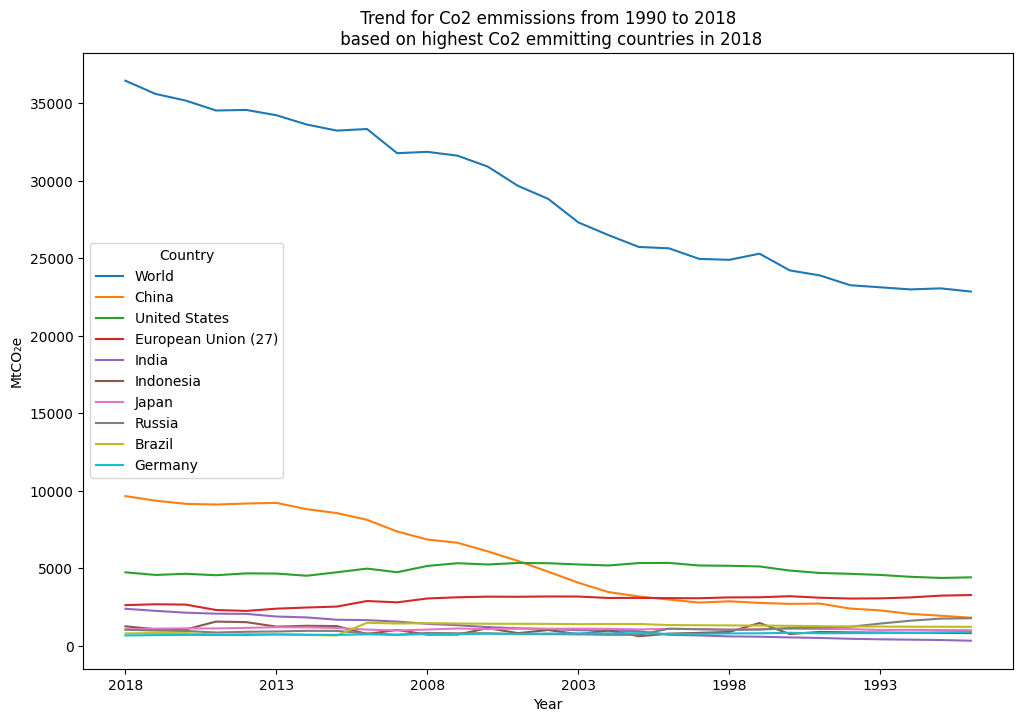

In [12]:
df1.plot(figsize=(12,8))#for plotting the graph
plt.title(" Trend for Co2 emmissions from 1990 to 2018 \n based on highest Co2 emmitting countries in 2018")
plt.ylabel("MtCO₂e")
plt.xlabel("Year")

plt.show()


In [13]:
#Increase in Co2 emmissions from 1990 to 2018 top 10 country wise.

#We can see China has the highest curve showing maximum increase in Co2 emmissions, followed by India's curve showing increasing
#trend.



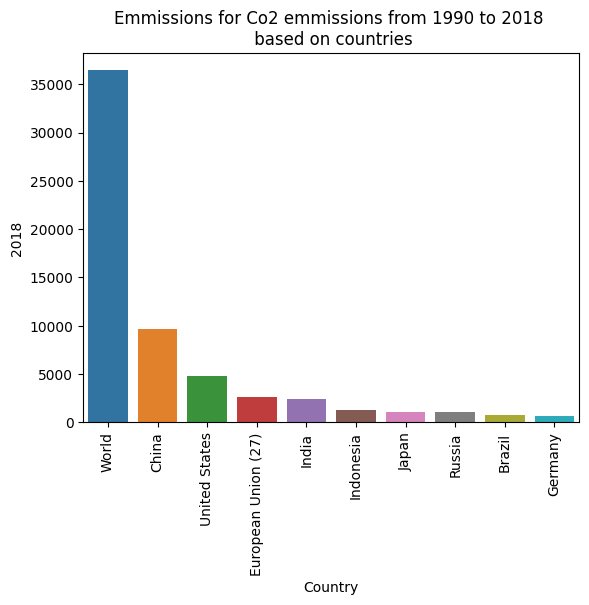

In [14]:
sns.barplot(x='Country', y='2018', data=df.iloc[:10,:])
plt.title("Emmissions for Co2 emmissions from 1990 to 2018 \n based on countries")
plt.xticks(rotation=90)
plt.show()

In [15]:
#We can see the countries with the highest emmissions in 2018 ,China leading, after US and European union with maximum emissions


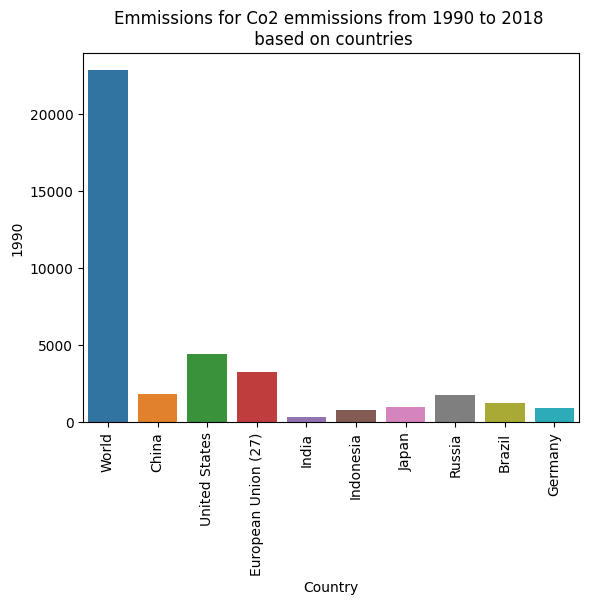

In [16]:
sns.barplot(x='Country', y='1990', data=df.iloc[:10,:])
plt.title("Emmissions for Co2 emmissions from 1990 to 2018 \n based on countries")
plt.xticks(rotation=90)
plt.show()

In [17]:
#In 1990 US had the highest emmissions, followed by EU and China/Russia at third place.
#We also see India had comparitively low emmissions rate compared to other 9 countries i.e below 1000 MtCO₂e



In [18]:
df['Change_CO2']=df["2018"]-df['1990']
#df['Change_CO2']

In [19]:
df2=df.sort_values(ascending=False, by='Change_CO2')
df2.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,Change_CO2
0,World,36441.55,35588.70,35160.60,34521.91,34558.59,34217.18,33620.34,33226.01,33328.38,...,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92,13591.63
1,China,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,...,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96,7839.40
4,India,2400.25,2267.16,2149.01,2085.38,2072.03,1901.98,1843.74,1695.97,1670.29,...,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32,2058.93
5,Indonesia,1269.55,1081.11,1068.10,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,907.96,1484.56,772.38,909.21,881.31,869.88,855.30,846.23,832.39,437.16
2,United States,4749.57,4581.90,4656.84,4563.52,4683.35,4670.34,4531.16,4753.12,4990.96,...,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40,323.17


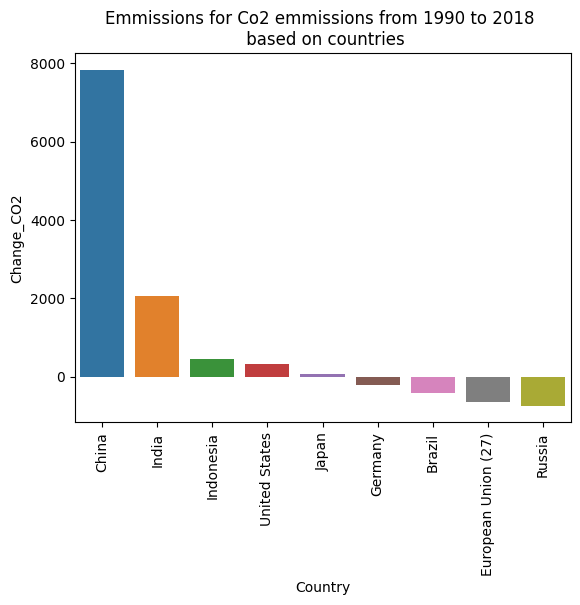

In [20]:
sns.barplot(x='Country', y='Change_CO2', data=df2.iloc[1:10,:])
plt.title("Emmissions for Co2 emmissions from 1990 to 2018 \n based on countries")
plt.xticks(rotation=90)
plt.show()

In [21]:
#China emissions has increased the highest from 2000 to almost 8000 MtCO₂e and second highest increase of India from 500 to 2000
#MtCO₂e as we can see the increasing trend in the below line plot

In [22]:
df2=df2.iloc[1:11,:-1]
df2=df2.transpose()
print(df2.shape)
df2.head()

(30, 9)


,1,4,5,2,6,9,8,3,7
Country,China,India,Indonesia,United States,Japan,Germany,Brazil,European Union (27),Russia
2018,9663.36,2400.25,1269.55,4749.57,1074.08,680.06,812.02,2636.99,1049.05
2017,9367.67,2267.16,1081.11,4581.9,1119.86,702.73,834.14,2692.12,998.24
2016,9164.21,2149.01,1068.1,4656.84,1139.33,717.68,826.21,2669.54,971.87
2015,9120.27,2085.38,1574.76,4563.52,1131.74,713.08,741.96,2321.61,870.02


In [23]:
head_row2=df2.iloc[0]
df2=df2[1:]
df2.columns=head_row2
df2.head()

Country,China,India,Indonesia,United States,Japan,Germany,Brazil,European Union (27),Russia
2018,9663.36,2400.25,1269.55,4749.57,1074.08,680.06,812.02,2636.99,1049.05
2017,9367.67,2267.16,1081.11,4581.9,1119.86,702.73,834.14,2692.12,998.24
2016,9164.21,2149.01,1068.1,4656.84,1139.33,717.68,826.21,2669.54,971.87
2015,9120.27,2085.38,1574.76,4563.52,1131.74,713.08,741.96,2321.61,870.02
2014,9184.77,2072.03,1539.23,4683.35,1170.11,708.25,768.77,2263.78,919.33


Text(0.5, 0, 'Year')

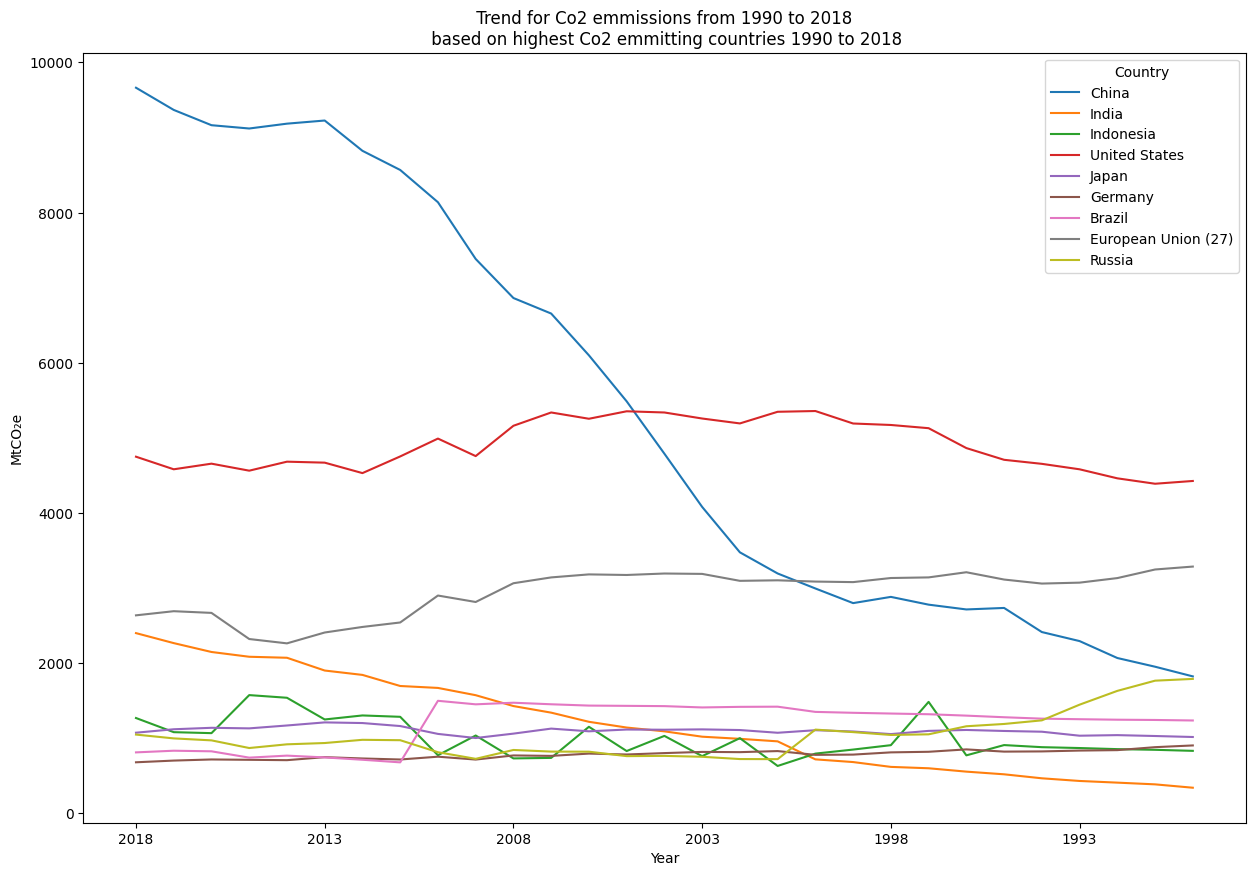

In [24]:
df2.plot(figsize=(15,10))
plt.title(" Trend for Co2 emmissions from 1990 to 2018 \n based on highest Co2 emmitting countries 1990 to 2018")
plt.ylabel("MtCO₂e")
plt.xlabel("Year")


In [25]:
#Outcome:-
#We can see the highest emissions is by China and further most increasing trend is also of China which shows high activities in 
# Co2 related industries and not any measures being taken to reduce these emissions
# India has increased Co2 emissions from 1990 to 2018 which also points to incraesed inductrial activity in India
# Countries like US and EU which were in the top countries from 2018 as well as 1990 are not in the last trend chart of showing 
# increase in Co2 emmissions can let us refer that these countries have somewhat maintained their Co2 emmissions as their values
# in both 1990 and 2018 remain consistant i.e approv 4000 MtCO₂e for US and 3000 MtCO₂e for EU and thus probably working on 
# cutting these or taking alternative energy approches.